In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [27]:
orb = cv2.ORB_create()

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

images = ['book1.jpg', 'book2.jpg', 'book3.jpg', 'book4.jpg'] 
# ???????? 순서대로 나열해서 리스트에 append 했는데, 뭘 기준으로 다시 파일 별로 나눴는지?
database_kp = []
database_desc = []
for name in images :
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    keypoints, desc = orb.detectAndCompute(img, None)
    database_kp.append(keypoints)
    database_desc.append(desc)

print(len(database_kp[0]))
print(len(database_kp[1]))
print(len(database_kp[2]))
print(len(database_kp[3]))

500
402
467
500


In [3]:
test = cv2.imread("book1test.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

4
18.64
52.74
59.92
38.08


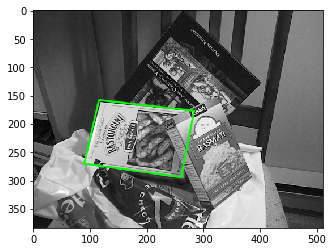

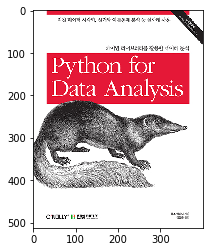

In [14]:
min_distance = 1000
idx = -1

for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)    
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test)
imshow("", cv2.imread(images[idx]))

In [5]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
    
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

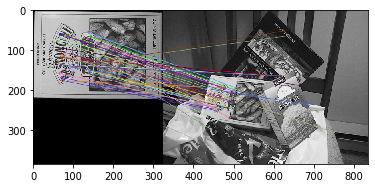

In [6]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

In [49]:
pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
# ???????????????? reshape 1,2를 하는 이유?

print(pts1.shape)  # 50,1,2

(50, 1, 2)
(136.0, 107.0)
[136. 107.]
(2,)
(1, 2)


In [8]:
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
print(H) # (3,3) 회전정보

[[ 4.85610150e-01 -1.26423343e-01  1.16639863e+02]
 [ 3.62734153e-02  4.76039278e-01  1.58710108e+02]
 [-1.20390936e-04 -1.08741047e-04  1.00000000e+00]]


In [9]:
(h, w) = src1.shape[:2]

corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
# ????????????? h,w에 -1을 해주는 이유?
corners2 = cv2.perspectiveTransform(corners1, H)

print(corners1)
print(corners2)

[[[  0.   0.]]

 [[  0. 222.]]

 [[323. 222.]]

 [[323.   0.]]]
[[[116.63986 158.71011]]

 [[ 90.76499 270.93124]]

 [[261.93488 294.67987]]

 [[284.5573  177.32181]]]


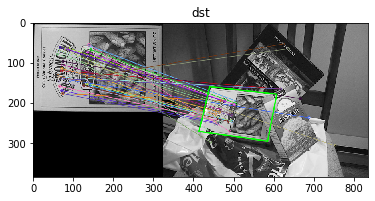

In [10]:
# dst 이미지 두개가 합쳐져 있어서 증가하게 된 위치값 고려해주는 단계
corners3 = corners2 + np.float32([w,0]) 

# 좌표 찍어주면 알아서 선 그려주는 함수
cv2.polylines(dst, [np.int32(corners3)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('dst', dst)

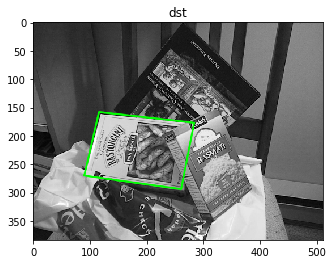

In [11]:
test = cv2.imread('box_in_scene.png')

cv2.polylines(test, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)
imshow('dst', test)

In [12]:
def findbook(src1, src2):
    keypoints1, desc1 = orb.detectAndCompute(src1, None)
    keypoints2, desc2 = orb.detectAndCompute(src2, None)
    
    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
    pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
    
    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    (h, w) = src1.shape[:2]

    corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
    corners2 = cv2.perspectiveTransform(corners1, H)

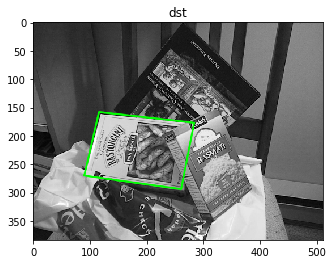

In [13]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
    
findbook(src1, src2)

test = cv2.imread('box_in_scene.png')

cv2.polylines(test, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)
imshow('dst', test)